In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
Train = pd.read_csv("DataSets/Train.csv")

In [3]:
Train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
Train['is_holiday'] = np.where(Train['is_holiday'] == "None", "Working Day", Train['is_holiday'])

# dateTimeSplits = Train["date_time"].str.split(" ")
# Train["Year"] = pd.DataFrame([ item[0].split("-")[0] for item in dateTimeSplits ])
# Train["Month"] = pd.DataFrame([ item[0].split("-")[1] for item in dateTimeSplits ])
# Train["Day"] = pd.DataFrame([ item[0].split("-")[2] for item in dateTimeSplits ])
# Train["hour"] = pd.DataFrame([ item[1].split(":")[0] for item in dateTimeSplits ])

In [5]:
data = {'traffic_volume':Train['traffic_volume'], 'date_time':Train['date_time']}
target = pd.DataFrame(data).set_index('date_time')
Train = Train.set_index('date_time')

In [6]:
# target['traffic_volume'] = Train['traffic_volume']
Train.drop(columns =["traffic_volume"], inplace = True)

In [7]:
Train.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
2012-10-02 09:00:00,Working Day,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds
2012-10-02 10:00:00,Working Day,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds
2012-10-02 11:00:00,Working Day,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds
2012-10-02 12:00:00,Working Day,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds
2012-10-02 13:00:00,Working Day,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds


In [8]:
target.head()

,traffic_volume
date_time,
2012-10-02 09:00:00,5545
2012-10-02 10:00:00,4516
2012-10-02 11:00:00,4767
2012-10-02 12:00:00,5026
2012-10-02 13:00:00,4918


In [9]:
Train.nunique()

is_holiday               12
air_pollution_index     290
humidity                 88
wind_speed               17
wind_direction          361
visibility_in_miles       9
dew_point                 9
temperature            5611
rain_p_h                353
snow_p_h                 12
clouds_all               60
weather_type             11
weather_description      38
dtype: int64

In [10]:
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
column_tuples = [
    ('is_holiday', LabelEncoder()),
    (['air_pollution_index'], StandardScaler()),
    (['humidity'], StandardScaler()),
    (['wind_speed'], StandardScaler()),
    (['wind_direction'], StandardScaler()),
    (['visibility_in_miles'], StandardScaler()),
    (['dew_point'], StandardScaler()),
    (['temperature'], StandardScaler()),
    (['rain_p_h'], StandardScaler()), 
    (['snow_p_h'], StandardScaler()),
    (['clouds_all'], StandardScaler()),
    ('weather_type', LabelEncoder()),
    ('weather_description', LabelEncoder())
#     (['Year'], StandardScaler()),
#     (['Month'], MinMaxScaler()),
#     (['Day'], MinMaxScaler()),
#     (['hour'], MinMaxScaler())
]
mapper = DataFrameMapper(column_tuples,df_out=True)

In [11]:
mapper_fit = mapper.fit(Train)
Train = mapper_fit.transform(Train)

In [12]:
Train.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
2012-10-02 09:00:00,11,-0.404153,1.055720,-0.670405,1.297362,-1.552441,-1.552441,0.612030,-0.008384,-0.032546,-0.269063,1,24
2012-10-02 10:00:00,11,0.276572,-0.249763,-0.183967,1.307378,-1.552441,-1.552441,0.692536,-0.008384,-0.032546,0.631348,1,2
2012-10-02 11:00:00,11,-0.499693,-0.309103,-0.183967,1.297362,-1.163334,-1.163334,0.708936,-0.008384,-0.032546,1.017238,1,19
2012-10-02 12:00:00,11,-1.610349,-0.309103,-0.183967,1.297362,0.003989,0.003989,0.749934,-0.008384,-0.032546,1.017238,1,19
2012-10-02 13:00:00,11,1.506654,-0.368443,-0.183967,1.297362,0.782204,0.782204,0.825223,-0.008384,-0.032546,0.631348,1,2


In [13]:
type(Train)

pandas.core.frame.DataFrame

In [14]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

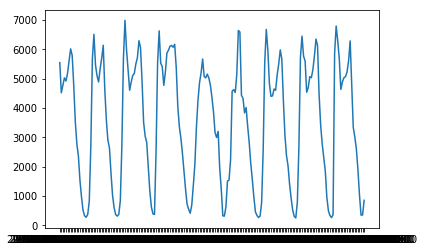

In [15]:
plt.plot(target[:200])

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [17]:
first_diff = target.traffic_volume - target.traffic_volume.shift(1)
first_diff = first_diff.dropna(inplace = False)
# test_stationarity(first_diff, window = 12)

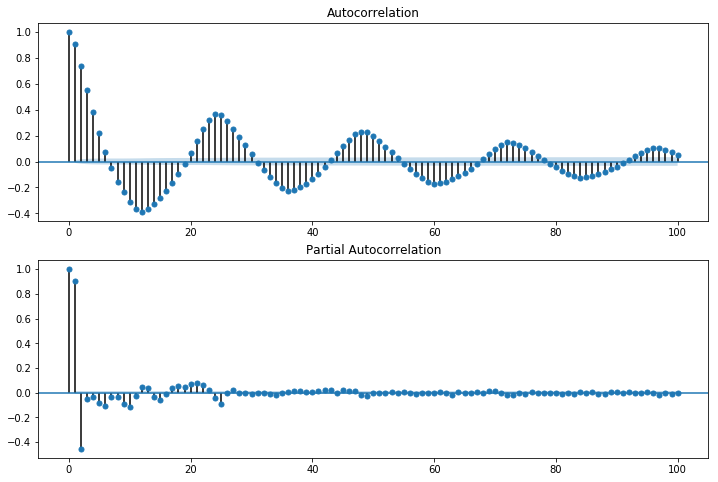

In [18]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(target.traffic_volume, lags=100, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(target.traffic_volume, lags=100, ax=ax2)# , lags=40

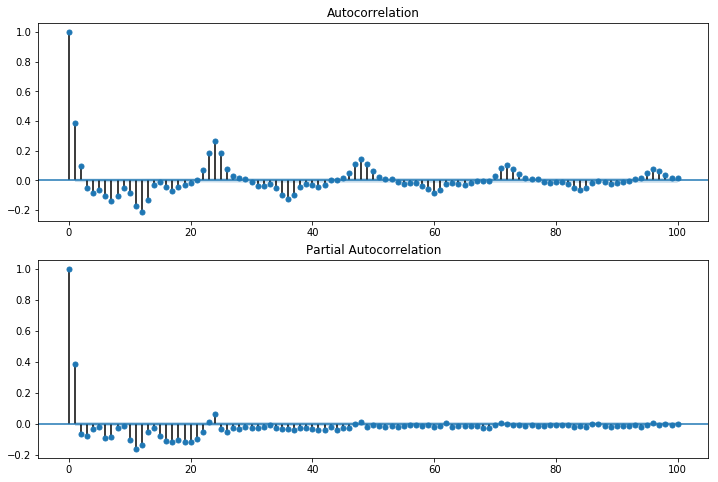

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=100, ax=ax2)

In [20]:
Train[:200].head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
2012-10-02 09:00:00,11,-0.404153,1.055720,-0.670405,1.297362,-1.552441,-1.552441,0.612030,-0.008384,-0.032546,-0.269063,1,24
2012-10-02 10:00:00,11,0.276572,-0.249763,-0.183967,1.307378,-1.552441,-1.552441,0.692536,-0.008384,-0.032546,0.631348,1,2
2012-10-02 11:00:00,11,-0.499693,-0.309103,-0.183967,1.297362,-1.163334,-1.163334,0.708936,-0.008384,-0.032546,1.017238,1,19
2012-10-02 12:00:00,11,-1.610349,-0.309103,-0.183967,1.297362,0.003989,0.003989,0.749934,-0.008384,-0.032546,1.017238,1,19
2012-10-02 13:00:00,11,1.506654,-0.368443,-0.183967,1.297362,0.782204,0.782204,0.825223,-0.008384,-0.032546,0.631348,1,2


In [21]:
from statsmodels.tsa.statespace import sarimax

In [22]:
import itertools
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 1, 0, 24)
SARIMAX: (0, 1, 0) x (0, 1, 1, 24)
SARIMAX: (0, 1, 0) x (1, 0, 0, 24)


In [23]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog = target[:500],
                                            exog = pd.DataFrame(Train[:500]),
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [24]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 6915.539224030065 for model SARIMAX(2, 1, 1)x(2, 1, 1, 24)


In [ ]:
# The smallest AIC is 6915.539224030065 for model SARIMAX(2, 1, 1)x(2, 1, 1, 24)

In [25]:
model = sarimax.SARIMAX(endog=pd.DataFrame(target[:500]),exog=pd.DataFrame(Train[:500]),order=(2,1,1),seasonal_order=(2,1,1,24),
                       enforce_stationarity = False,
                       enforce_invertibility= False)

In [26]:
fit_model = model.fit()

In [27]:
forec = fit_model.forecast(steps=100,exog=pd.DataFrame(Train[500:600]))

In [28]:
orig = pd.Series(list(target[:600]["traffic_volume"]))

Text(0.5,1,'Comaprison of flow Between Original Forecast Seasonal Arima Model (SARIMAX)')

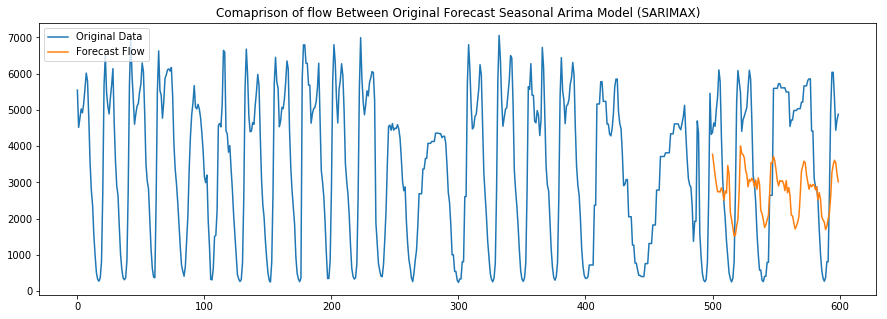

In [29]:
plt.figure(figsize=(15,5))
plt.plot(orig,label="Original Data")
plt.plot(forec,label="Forecast Flow")
plt.legend(loc='upper left')
plt.title("Comaprison of flow Between Original Forecast Seasonal Arima Model (SARIMAX)")

In [ ]:
import pickle

In [ ]:
pickle.dump(mapper_fit, open('fitted_mapper.pkl', 'wb'))

In [ ]:
def preProcessingScript(dataFrame):
    dataFrame['is_holiday'] = np.where(dataFrame['is_holiday'] == "None", "Working Day", dataFrame['is_holiday'])
    dateTimeSplits = dataFrame["date_time"].str.split(" ")
    dataFrame["Year"] = pd.DataFrame([ item[0].split("-")[0] for item in dateTimeSplits ])
    dataFrame["Month"] = pd.DataFrame([ item[0].split("-")[1] for item in dateTimeSplits ])
    dataFrame["Day"] = pd.DataFrame([ item[0].split("-")[2] for item in dateTimeSplits ])
    dataFrame["hour"] = pd.DataFrame([ item[1].split(":")[0] for item in dateTimeSplits ])
    dataFrame.drop(columns =["date_time"], inplace = True)
    mapper_fit = pickle.load(open('fitted_mapper.pkl', 'rb'))
    return mapper_fit.transform(dataFrame)

In [ ]:
Train.shape

# Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold, cross_val_score
def baseline_model():
    model = Sequential()
    model.add(Dense(13, input_dim=17, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
model = baseline_model()

In [ ]:
model


In [ ]:
dataForT = Train[:10000]
targetForT = target[:10000]

In [ ]:
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=25, verbose=0)

In [ ]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, dataForT, targetForT, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
predict(processedTestData[:10])

In [ ]:
Test = pd.read_csv("DataSets/Test.csv")

In [ ]:
processedTestData = preProcessingScript(Test)

In [ ]:
processedTestData.head()

# LSTM

In [ ]:
def build_LSTM_model():
    model = Sequential()
    layers = {'input': 1, 'hidden1': 64, 'hidden2': 256, 'hidden3': 100, 'output': 1}

    model.add(LSTM(
            input_length=sequence_length - 1,
            input_dim=layers['input'],
            output_dim=layers['hidden1'],
            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
            layers['hidden2'],
            return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
            layers['hidden3'],
            return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
            output_dim=layers['output']))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print ("Compilation Time : "+ str(time.time() - start))
    return model

In [ ]:
def run_network(model=None, data=None):
    global_start_time = time.time()

    if data is None:
        print('Loading data... ')
        # train on first 700 samples and test on next 300 samples (has anomaly)
        X_train, y_train, X_test, y_test = get_split_prep_data(0, 700, 500, 1000)
    else:
        X_train, y_train, X_test, y_test = data

    print('\nData Loaded. Compiling...\n')

    if model is None:
        model = build_model()

    try:
        print("Training...")
        model.fit(
                X_train, y_train,
                batch_size=batch_size, nb_epoch=epochs, validation_split=0.05)
        print("Predicting...")
        predicted = model.predict(X_test)
        print("Reshaping predicted")
        predicted = np.reshape(predicted, (predicted.size,))
    except KeyboardInterrupt:
        print("prediction exception")
        print ('Training duration (s) : '+ str(time.time() - global_start_time))
        return model, y_test, 0

    try:
        plt.figure(1)
        plt.subplot(311)
        plt.title("Actual Test Signal w/Anomalies")
        plt.plot(y_test[:len(y_test)], 'b')
        plt.subplot(312)
        plt.title("Predicted Signal")
        plt.plot(predicted[:len(y_test)], 'g')
        plt.subplot(313)
        plt.title("Squared Error")
        mse = ((y_test - predicted) ** 2)
        plt.plot(mse, 'r')
        plt.show()
    except Exception as e:
        print("plotting exception")
        print(str(e))
    print ('Training duration (s) : '+ str(time.time() - global_start_time))

    return model, y_test, predicted